In [1]:
options(jupyter.rich_display=FALSE) # Create output as usual in R
options(width=120)

In [2]:
csv.files <- dir("ManifestoProject",
                 full.names=TRUE,
                 pattern="*.csv")
length(csv.files)

[1] 14

In [3]:
# 'readtext' (a companion package for 'quanteda') is somewhat better able to
# deal with the Manfisto Project CSV files than 'tm':
library(readtext)
UKLib.rt <- readtext("ManifestoProject/*.csv",
               text_field=1,
               docvarsfrom="filenames",
               docvarnames=c("party","date"))
nrow(UKLib.rt)

[1] 4228

In [4]:
# Here we cerate an index of documents in the corpus:
UKLib.rta <- aggregate(text~party+date,
                       FUN=function(x)paste(x,collapse=" "),
                       data=UKLib.rt)
nrow(UKLib.rta)

[1] 14

In [5]:
UKLib.rta <- within(UKLib.rta,
              doc_id <- paste(party,date,sep="_"))

In [6]:
library(quanteda)

Package version: 2.1.1

Parallel computing: 2 of 12 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [7]:
UKLib.corpus <- corpus(UKLib.rta)
UKLib.corpus

Corpus consisting of 14 documents and 2 docvars.
51420_196410 :
"""THINK FOR YOURSELF""  The Liberal Party offers the elector..."

51420_196603 :
"For All the People: the Liberal Plan of 1966  BRITAIN DEMAND..."

51420_197006 :
"What a Life!  There must surely be a better way to run a cou..."

51420_197402 :
"'Change the face of Britain'  THE CRISIS OF GOVERNMENT  This..."

51420_197410 :
"Why Britain Needs Liberal Government  A PERSONAL MESSAGE FRO..."

51420_197905 :
"'The Real Fight is for Britain'  INTRODUCTION  With your sup..."

[ reached max_ndoc ... 8 more documents ]

In [8]:
# Here we combine metadata with the text documents:
manifesto.metadata <- read.csv("documents_MPDataset_MPDS2019b.csv",stringsAsFactors=FALSE)
str(manifesto.metadata)

'data.frame':	4492 obs. of  6 variables:
 $ country    : int  11 11 11 11 11 11 11 11 11 11 ...
 $ countryname: chr  "Sweden" "Sweden" "Sweden" "Sweden" ...
 $ party      : int  11110 11110 11110 11110 11110 11110 11110 11110 11110 11220 ...
 $ partyname  : chr  "Green Ecology Party" "Green Ecology Party" "Green Ecology Party" "Green Ecology Party" ...
 $ date       : int  198809 199109 199409 199809 200209 200609 201009 201409 201809 194409 ...
 $ title      : chr  "Valmanifest" "Valmanifest ‘91" "Valmanifest" "Valmanifest 98" ...


In [9]:
docvars(UKLib.corpus) <- merge(docvars(UKLib.corpus),
                               manifesto.metadata,
                               by=c("party","date"))
str(docvars(UKLib.corpus))

'data.frame':	14 obs. of  6 variables:
 $ party      : int  51420 51420 51420 51420 51420 51420 51420 51420 51421 51421 ...
 $ date       : int  196410 196603 197006 197402 197410 197905 198306 198706 199204 199705 ...
 $ country    : int  51 51 51 51 51 51 51 51 51 51 ...
 $ countryname: chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...
 $ partyname  : chr  "Liberal Party" "Liberal Party" "Liberal Party" "Liberal Party" ...
 $ title      : chr  "Think for Yourself - Vote Liberal" "For all the People: The Liberal Plan of 1966" "What a Life!" "Change the Face of Britain" ...


In [10]:
# Finally we create a document-feature matrix, without punctuation, numbers,
# symbols and stopwords:
UKLib.dfm <- dfm(UKLib.corpus,
                 remove_punct=TRUE,
                 remove_numbers=TRUE,
                 remove_symbols=TRUE,
                 remove=stopwords("english"),
                 stem=TRUE)
str(docvars(UKLib.dfm))

'data.frame':	14 obs. of  6 variables:
 $ party      : int  51420 51420 51420 51420 51420 51420 51420 51420 51421 51421 ...
 $ date       : int  196410 196603 197006 197402 197410 197905 198306 198706 199204 199705 ...
 $ country    : int  51 51 51 51 51 51 51 51 51 51 ...
 $ countryname: chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...
 $ partyname  : chr  "Liberal Party" "Liberal Party" "Liberal Party" "Liberal Party" ...
 $ title      : chr  "Think for Yourself - Vote Liberal" "For all the People: The Liberal Plan of 1966" "What a Life!" "Change the Face of Britain" ...


In [11]:
# A more fine-grained control is possible using 'tokens()'
UKLib.toks <- tokens(UKLib.corpus,
                     remove_punct=TRUE,
                     remove_numbers=TRUE)
UKLib.toks

Tokens consisting of 14 documents and 6 docvars.
51420_196410 :
 [1] "THINK"         "FOR"           "YOURSELF"      "The"           "Liberal"       "Party"         "offers"       
 [8] "the"           "electorate"    "a"             "radical"       "non-Socialist"
[ ... and 8,853 more ]

51420_196603 :
 [1] "For"     "All"     "the"     "People"  "the"     "Liberal" "Plan"    "of"      "BRITAIN" "DEMANDS" "A"      
[12] "NEW"    
[ ... and 31,786 more ]

51420_197006 :
 [1] "What"   "a"      "Life"   "There"  "must"   "surely" "be"     "a"      "better" "way"    "to"     "run"   
[ ... and 23,962 more ]

51420_197402 :
 [1] "Change"     "the"        "face"       "of"         "Britain"    "THE"        "CRISIS"     "OF"        
 [9] "GOVERNMENT" "This"       "country"    "has"       
[ ... and 13,764 more ]

51420_197410 :
 [1] "Why"        "Britain"    "Needs"      "Liberal"    "Government" "A"          "PERSONAL"   "MESSAGE"   
 [9] "FROM"       "THE"        "RT"         "HON"       


In [12]:
UKLib.dfm <- dfm(UKLib.toks)
UKLib.dfm

Document-feature matrix of: 14 documents, 9,908 features (73.8% sparse) and 6 docvars.
              features
docs           think for yourself  the liberal party offers electorate   a radical
  51420_196410     2 132        2  530      32     4      1          1 195       3
  51420_196603     1 489        1 1824      81    12      3          1 597       6
  51420_197006     1 373        0 1336     132    19      1          0 414       1
  51420_197402     2 174        0  852      38    29      1          0 291       4
  51420_197410     1 166        0  634      30    24      0          6 232       4
  51420_197905     1 174        0  700      36    10      1          6 237       7
[ reached max_ndoc ... 8 more documents, reached max_nfeat ... 9,898 more features ]

In [13]:
UKLib.dfm <- dfm_remove(UKLib.dfm,
                        pattern=stopwords("english"))
UKLib.dfm

Document-feature matrix of: 14 documents, 9,765 features (74.4% sparse) and 6 docvars.
              features
docs           think liberal party offers electorate radical non-socialist alternative long run
  51420_196410     2      32     4      1          1       3             1           5    4   4
  51420_196603     1      81    12      3          1       6             0           7   26   6
  51420_197006     1     132    19      1          0       1             0           8    6   6
  51420_197402     2      38    29      1          0       4             0           1   11   4
  51420_197410     1      30    24      0          6       4             0           4    9   3
  51420_197905     1      36    10      1          6       7             0           3   10   4
[ reached max_ndoc ... 8 more documents, reached max_nfeat ... 9,755 more features ]

In [14]:
UKLib.dfm <- dfm_wordstem(UKLib.dfm,language="english")
UKLib.dfm

Document-feature matrix of: 14 documents, 6,166 features (70.6% sparse) and 6 docvars.
              features
docs           think liber parti offer elector radic non-socialist altern long run
  51420_196410     3    46     7     1       1     3             1      6    4   7
  51420_196603     3    98    19    20       7     6             0     10   26  12
  51420_197006     2   149    31     6       2     1             0     15    6  10
  51420_197402     2    67    42     9       3     4             0      2   11   5
  51420_197410     3    44    31     1      11     5             0      5    9   4
  51420_197905     1    64    26     7      18     7             0      6   10   7
[ reached max_ndoc ... 8 more documents, reached max_nfeat ... 6,156 more features ]

In [15]:
# 'quanteda' provides support for dictionaries:
milecondict <- dictionary(list(
                Military=c("military","forces","war","defence","victory","victorious","glory"),
                Economy=c("economy","growth","business","enterprise","market")
))

In [16]:
# Here we extract the frequency of tokens belonging to certain dictionaries:
UKLib.milecon.dfm <- dfm(UKLib.corpus,
                         dictionary=milecondict)
UKLib.milecon.dfm

Document-feature matrix of: 14 documents, 2 features (0.0% sparse) and 6 docvars.
              features
docs           Military Economy
  51420_196410       11      29
  51420_196603       40      83
  51420_197006       31      77
  51420_197402       14      50
  51420_197410        5      31
  51420_197905       23      34
[ reached max_ndoc ... 8 more documents ]

In [17]:
time <- with(docvars(UKLib.milecon.dfm),
             ISOdate(year=date%/%100,
                     month=date%%100,
                     day=1))
time

 [1] "1964-10-01 12:00:00 GMT" "1966-03-01 12:00:00 GMT" "1970-06-01 12:00:00 GMT" "1974-02-01 12:00:00 GMT"
 [5] "1974-10-01 12:00:00 GMT" "1979-05-01 12:00:00 GMT" "1983-06-01 12:00:00 GMT" "1987-06-01 12:00:00 GMT"
 [9] "1992-04-01 12:00:00 GMT" "1997-05-01 12:00:00 GMT" "2001-06-01 12:00:00 GMT" "2005-05-01 12:00:00 GMT"
[13] "2015-05-01 12:00:00 GMT" "2017-06-01 12:00:00 GMT"

In [18]:
UKLib.ntok <- ntoken(UKLib.corpus)

In [19]:
milit.freq <- as.vector(UKLib.milecon.dfm[,"Military"])
econ.freq <- as.vector(UKLib.milecon.dfm[,"Economy"])
milit.prop <- milit.freq/UKLib.ntok
econ.prop <- econ.freq/UKLib.ntok

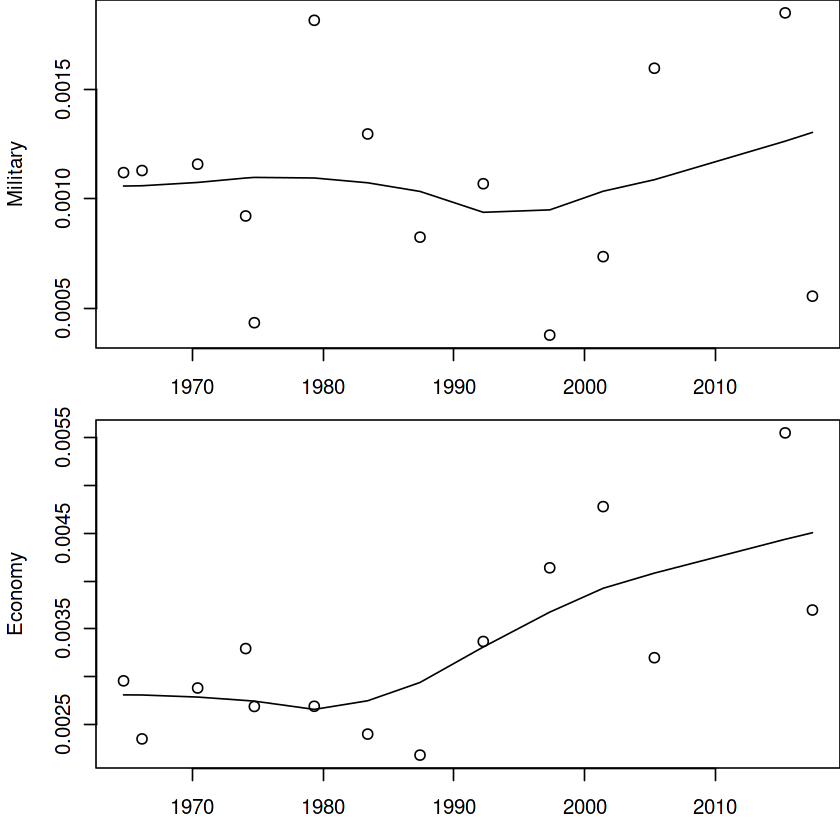

In [20]:
# We plot the frequency of tokens over time
op <- par(mfrow=c(2,1),mar=c(3,4,0,0))
plot(time,milit.prop,type="p",ylab="Military")
lines(time,lowess(time,milit.prop)$y)
plot(time,econ.prop,type="p",ylab="Economy")
lines(time,lowess(time,econ.prop)$y)
par(op)